## Generate embeddings


In [35]:
import os

from dotenv import load_dotenv
from openai import OpenAI

load_dotenv()

openai_client = OpenAI(
    base_url="https://models.github.ai/inference",
    api_key=os.environ["GITHUB_TOKEN"]
)
MODEL_NAME = "openai/text-embedding-3-small"
MODEL_DIMENSIONS = 1536 

It is important that the dimensions matches the vector embedding model used, different models have different dimensions

In [ ]:
embeddings_response = openai_client.embeddings.create(
    model=MODEL_NAME,
    dimensions=MODEL_DIMENSIONS,
    input="A big dog",
)
embedding = embeddings_response.data[0].embedding

print(len(embedding))
print(embedding)

1536
[0.05267680063843727, -0.02815580554306507, 1.5290672308765352e-05, 0.03785795718431473, -0.05838065966963768, 0.006741875782608986, -0.014511284418404102, 0.012966489419341087, -0.06481147557497025, -0.0023032119497656822, 0.0228713508695364, -0.005228536203503609, -0.037130992859601974, -0.004305853042751551, -0.018313856795430183, 0.0006374025833792984, 0.010492022149264812, -0.0017081864643841982, -0.007451362907886505, 0.020970065146684647, -0.00014253090193960816, 0.033132702112197876, -0.0006631782744079828, -0.023654231801629066, 0.02966565079987049, 0.020830264315009117, -0.0017143028089776635, 0.011177044361829758, 0.07068309932947159, -0.005221546161919832, 0.015084465965628624, -0.0313432551920414, 0.021249664947390556, -0.010324262082576752, -0.024227414280176163, -0.04490389674901962, -0.03738263621926308, 0.02645024098455906, -0.010499011725187302, 0.014972626231610775, 0.017768634483218193, -0.0221723485738039, 0.034782346338033676, 0.0039353822357952595, 0.0327971

## Comparison of Models

In [37]:
# Load in vectors from openai and googlenews
import json

with open('embeddings/words_word2vec-google-news.json') as f:
    vectors_word2vec = json.load(f)
    
with open('embeddings/words_text-embedding-ada-002.json') as f:
    vectors_ada2 = json.load(f)

with open('embeddings/words_text-embedding-3-small-1536.json') as f:
    vectors_emb3 = json.load(f)

vectors_word2vec["queen"]

[0.0052490234375,
 -0.1435546875,
 -0.0693359375,
 0.12353515625,
 0.1318359375,
 -0.0888671875,
 -0.0712890625,
 -0.216796875,
 -0.197265625,
 0.0556640625,
 -0.07568359375,
 -0.380859375,
 0.10400390625,
 -0.00081634521484375,
 0.1328125,
 0.11279296875,
 0.07275390625,
 -0.046875,
 0.06591796875,
 0.09423828125,
 0.1904296875,
 0.13671875,
 -0.236328125,
 -0.11865234375,
 0.0654296875,
 -0.05322265625,
 -0.30859375,
 0.091796875,
 0.1884765625,
 -0.1669921875,
 -0.15625,
 -0.130859375,
 -0.08251953125,
 0.212890625,
 -0.35546875,
 -0.1318359375,
 0.09619140625,
 0.263671875,
 -0.0947265625,
 0.18359375,
 0.10693359375,
 -0.416015625,
 0.26953125,
 -0.0277099609375,
 0.17578125,
 -0.11279296875,
 -0.004119873046875,
 0.1455078125,
 0.15625,
 0.267578125,
 -0.0179443359375,
 0.0986328125,
 0.052978515625,
 -0.03125,
 -0.1630859375,
 -0.05810546875,
 -0.34375,
 -0.1728515625,
 0.1142578125,
 -0.09033203125,
 0.134765625,
 0.279296875,
 -0.0498046875,
 0.1298828125,
 0.17578125,
 -0.221

In [38]:
import matplotlib.pyplot as plt


def render_vector(vector):
    """Visualize the values of the vector in a bar chart"""
    fig = plt.figure()
    ax = fig.add_subplot(111)
    # Set the face color of the axis (plot area) to light gray
    ax.set_facecolor("#ffffff")
    # Make sure the figure face color is transparent
    fig.patch.set_alpha(0.0)
    ax.bar(range(len(vector)), vector, color="#0020BE")  # Set bar color to purple
    ax.set_xlabel('Dimension', fontweight='bold')  # Make x-axis label bold
    ax.set_ylabel('Value', fontweight='bold')  # Make y-axis label bold
    # Adjust the height of the graph
    fig.set_size_inches(fig.get_size_inches()[0], 3)
    plt.show()

For the same word but using different vector embedding models, we can see that the values for text-embedding-3-small are more distrubuted 

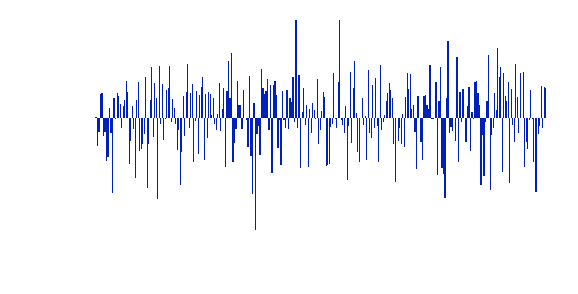

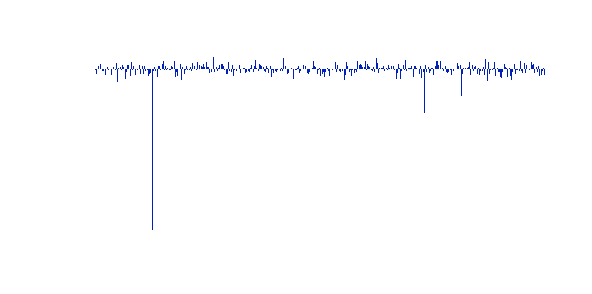

In [39]:

render_vector(vectors_word2vec['queen'])
render_vector(vectors_ada2['queen'])

## Vector Similarity


In [40]:
def cosine_similarity(v1, v2):

  dot_product = sum(
    [a * b for a, b in zip(v1, v2)])
  
  magnitude = (
    sum([a**2 for a in v1]) *
    sum([a**2 for a in v2])) ** 0.5

  return dot_product / magnitude

In [41]:

cosine_similarity(vectors_emb3['dog'], vectors_emb3['cat'])

0.6025387572540721

### Finding most similar words using cosine similarity

In [42]:
import pandas as pd

def most_similar(word: str, vectors: dict) -> list[list]:
    """Return the 10 most similar words and similarities to the given word"""
    word_vector = vectors[word]
    similarities = {w: cosine_similarity(word_vector, vector) for w, vector in vectors.items()}
    most_similar_words = sorted(similarities, key=similarities.get, reverse=True)
    return pd.DataFrame([(word, similarities[word]) for word in most_similar_words[:10]], columns=['word', 'similarity'])

#### text-embedding-ada-002

In [43]:
word = 'dog'
most_similar(word, vectors_ada2)

,word,similarity
0,dog,1.000000
1,animal,0.885472
2,god,0.865986
3,cat,0.863493
4,fish,0.856640
5,bird,0.855640
6,diet,0.852973
7,horse,0.852069
8,drug,0.850611
9,gun,0.849355


#### text-embedding-3-small

In [44]:
most_similar(word, vectors_emb3)

,word,similarity
0,dog,1.000000
1,animal,0.681331
2,horse,0.674941
3,cat,0.602539
4,boy,0.556805
5,man,0.531099
6,child,0.522607
7,bird,0.510155
8,door,0.480681
9,baby,0.473690


#### word2vec

In [45]:
most_similar(word, vectors_word2vec)

,word,similarity
0,dog,1.000000
1,cat,0.760946
2,animal,0.643801
3,horse,0.482581
4,bird,0.450441
5,child,0.370100
6,baby,0.356009
7,boy,0.352168
8,woman,0.351105
9,mother,0.345503


### Visualizations of Similarity Space

using PCA we can visualize the vectors in smaller dimensions to see the relationships between words and how they cluster together

In [46]:
import numpy as np
from sklearn.decomposition import PCA


def perform_pca(vectors: dict):
    """Perform PCA on the word vectors and return the PCA-transformed vectors"""
    X = np.array(list(vectors.values()))
    pca = PCA(n_components=3)
    X_pca = pca.fit_transform(X)
    X_pca = {list(vectors.keys())[i]: X_pca[i] for i in range(len(vectors))}
    return X_pca

vectors_w2vc_pca = perform_pca(vectors_word2vec)
vectors_ada2_pca = perform_pca(vectors_ada2)
vectors_emb3_pca = perform_pca(vectors_emb3)

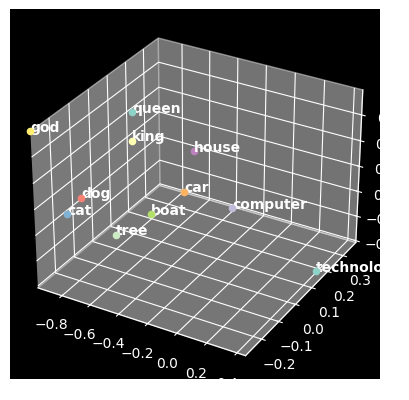

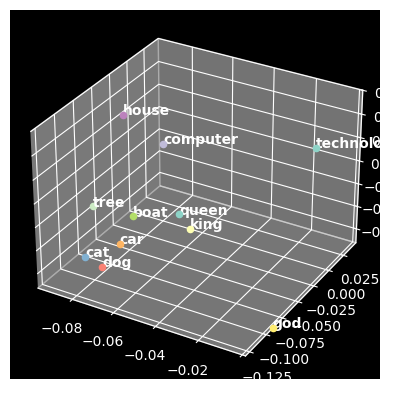

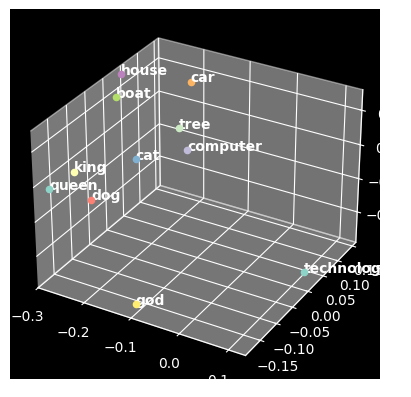

In [47]:
import matplotlib.pyplot as plt

def render_vectors_3d(vectors: dict):
    """Render 3-dimensional vectors (key: [,,,]) in a 3D plot"""
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    fig.patch.set_alpha(0.0)
    # Plot the vectors as points
    for key, vector in vectors.items():
        ax.scatter(vector[0], vector[1], vector[2])
        ax.text(vector[0], vector[1], vector[2], key, fontweight="bold")

    # Figure out the max and min values for each dimension
    min_x = min(v[0] for v in vectors.values())
    max_x = max(v[0] for v in vectors.values())
    min_y = min(v[1] for v in vectors.values())
    max_y = max(v[1] for v in vectors.values())
    min_z = min(v[2] for v in vectors.values())
    max_z = max(v[2] for v in vectors.values())
    ax.set_xlim([min_x, max_x])
    ax.set_ylim([min_y, max_y])
    ax.set_zlim([min_z, max_z])
    plt.show()


# Get subset of the vectors for plotting
words = ['queen', 'king', 'computer', 'dog', 'cat', 'car', 'boat', 'house', 'tree', 'god', 'technology']

word_pca_vectors_w2vc = {word: vectors_w2vc_pca[word] for word in words}
word_pca_vectors_ada2 = {word: vectors_ada2_pca[word] for word in words}
word_pca_vectors_emb3 = {word: vectors_emb3_pca[word] for word in words}

# Plot the vectors
render_vectors_3d(word_pca_vectors_w2vc)
render_vectors_3d(word_pca_vectors_ada2)
render_vectors_3d(word_pca_vectors_emb3)

### Range of similarity values

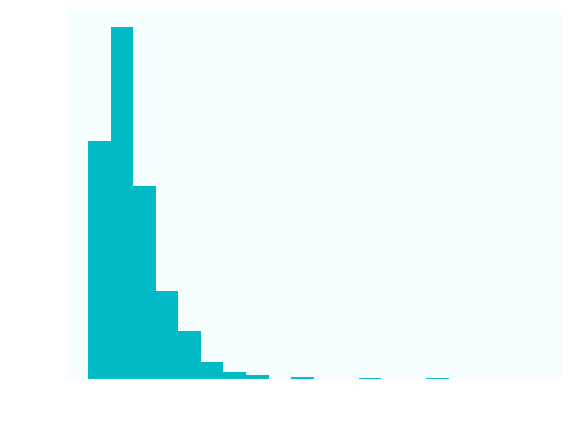

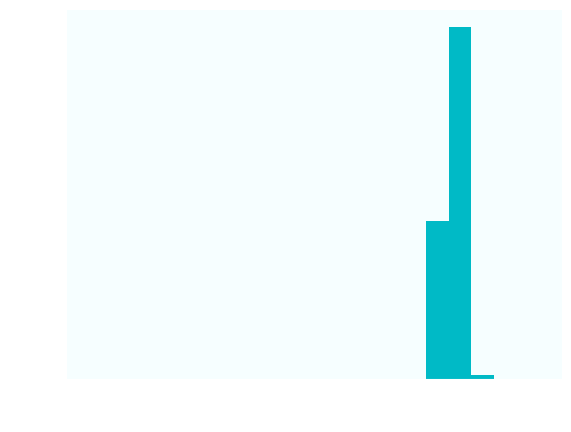

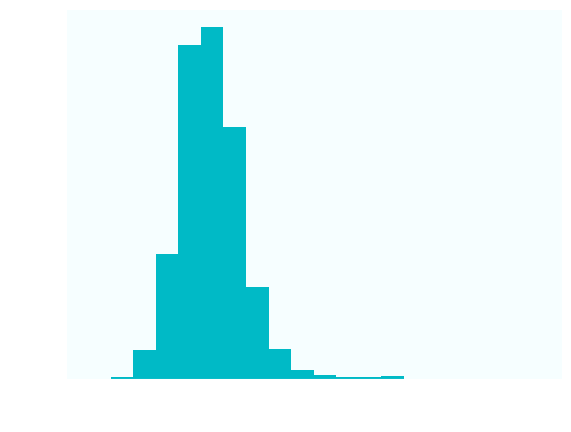

In [48]:
import matplotlib.pyplot as plt

def cosine_similarity_histogram(word: str, vectors: dict):
    """Plot a histogram of the cosine similarities of the word to all other words"""
    word_vector = vectors[word]
    similarities = [cosine_similarity(word_vector, vectors[w]) for w in vectors if w != word]
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_facecolor('#f6feff')
    fig.patch.set_alpha(0.0)
    ax.hist(similarities, bins=20, range=(0, 1), color='#00bac6')
    ax.set_xlabel('Cosine similarity', fontweight='bold')
    ax.set_ylabel('Frequency', fontweight='bold')
    plt.show()

word = 'dog'
cosine_similarity_histogram(word, vectors_word2vec)
cosine_similarity_histogram(word, vectors_ada2)
cosine_similarity_histogram(word, vectors_emb3)

### Vector Similarity Use Cases

#### Movie recommendation

In [49]:
with open('embeddings/movies_text-embedding-3-small-1536.json') as f:
    movies = json.load(f)

# Find the 10 most similar movies to a target movie
target_movie = movies['101 Dalmatians']

# Calculate the cosine similarity between the target movie and all other movies
similarities = [cosine_similarity(target_movie, movie) for movie in movies.values()]

# Find mmost similar movies by setting reverse to true
most_similar = sorted(range(len(similarities)), key=lambda i: similarities[i], reverse=True)[1:11]

similar_movies = [(list(movies.keys())[i], round(similarities[i], 3)) for i in most_similar]
pd.DataFrame(similar_movies, columns=['movie', 'similarity'])

,movie,similarity
0,102 Dalmatians,0.887
1,The Aristocats,0.540
2,Snow Dogs,0.478
3,Beverly Hills Chihuahua,0.456
4,The Fox and the Hound,0.449
5,Old Dogs,0.442
6,The Rescuers,0.438
7,That Darn Cat,0.431
8,Lady and the Tramp,0.427
9,The Rescuers Down Under,0.425


We can also find the least similar movies

In [50]:
least_similar = sorted(range(len(similarities)), key=lambda i: similarities[i])[1:11]
similar_movies = [(list(movies.keys())[i], round(similarities[i], 3)) for i in least_similar]
pd.DataFrame(similar_movies, columns=['movie', 'similarity'])

,movie,similarity
0,Mumford,0.079
1,Renaissance Man,0.080
2,Phenomenon,0.083
3,Hauru no ugoku shiro,0.089
4,Jefferson in Paris,0.092
5,Hidalgo,0.095
6,Son in Law,0.095
7,Medicine Man,0.104
8,Haakon Haakonsen,0.105
9,Un indien dans la ville,0.107


### Fraud Detection


Use vectors to check if an input is similar to a fraud input (requires a fraud detection data set)
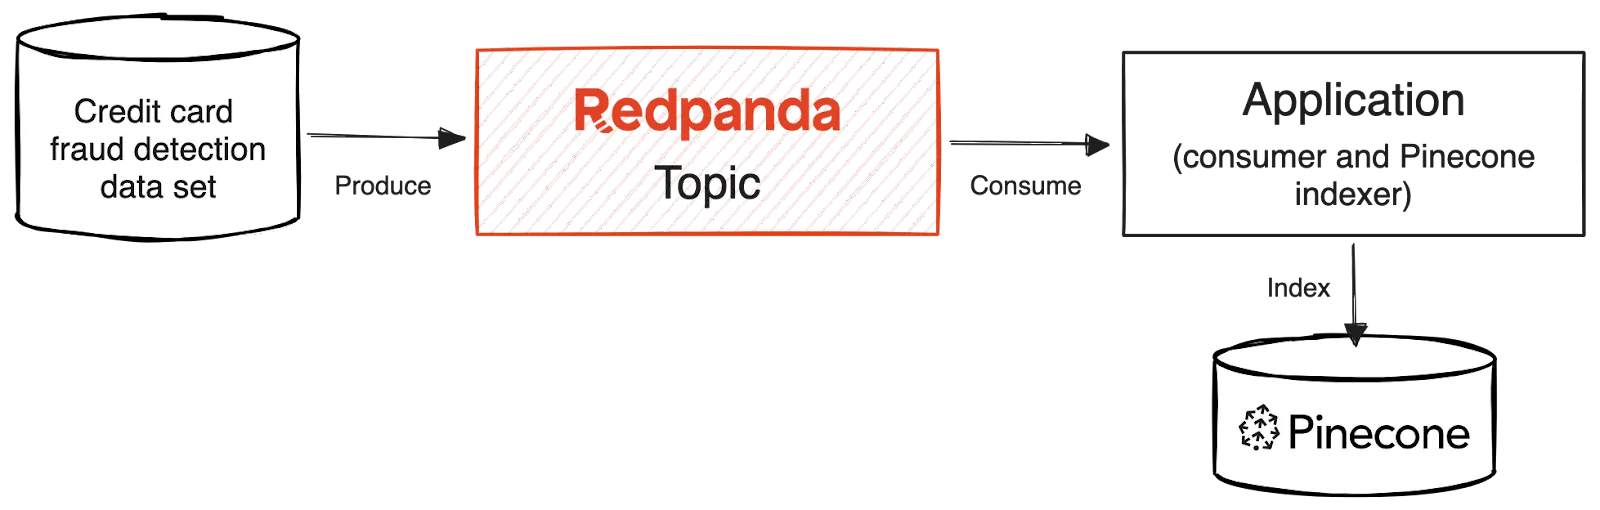
https://www.redpanda.com/blog/fraud-detection-pipeline-redpanda-pinecone